In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

In [82]:
# import data
data = pd.read_excel('Survey Data.xlsx')

# Display the first few rows of the dataframe to confirm successful load
data.head()

,Participant ID,Age,Gender,Occupation,Tech Savviness,Frequency of PWA Usage,Duration of Usage Sessions,Devices Used,Types of PWAs Used,Initial Load Time Perception,...,Overall Satisfaction with PWAs,Comparison with Native Apps,Likelihood to Recommend PWAs,Preference for Using PWAs,Offline Functionality Satisfaction,Speed of Content Updates,Accessibility Features Satisfaction,Likes About PWAs,Improvements for PWAs,Difficulties Encountered
0,1,27,Male,Software Engineer,Intermediate,Daily,30 minutes,"Smartphone, Laptop",Social Media,Fast,...,Very Satisfied,Better,Very Likely,Strongly Prefer,Very Satisfied,Very Fast,Very Satisfied,Enjoy connecting with friends.,More personalized suggestions based on interests.,Occasionally slow loading times when connectiv...
1,2,35,Female,Marketing Manager,Advanced,Weekly,1 hour,"Smartphone, Tablet","News, Social Media",Very Fast,...,Satisfied,Same,Likely,Prefer,Satisfied,Fast,Satisfied,Easy to use interface.,Ability to save articles for offline reading.,None encountered.
2,3,45,Male,Teacher,Beginner,Weekly,45 minutes,Smartphone,"News, E-commerce",Fast,...,Satisfied,Same,Likely,Neutral,Satisfied,Fast,Satisfied,Convenient access to news.,Improved filtering options for product searches.,None encountered.
3,4,22,Female,Student,Intermediate,Daily,20 minutes,"Smartphone, Laptop",Social Media,Fast,...,Satisfied,Same,Likely,Prefer,Satisfied,Fast,Satisfied,Variety of content.,Faster loading of images.,Limited offline functionality.
4,5,38,Male,Financial Analyst,Advanced,Monthly,2 hours,Laptop,E-commerce,Fast,...,Neutral,Worse,Neutral,Neutral,Neutral,Fast,Satisfied,Wide range of products available.,Streamlined checkout process.,Occasional site crashes during checkout.


Descriptive Statistics:

In [83]:
# Participant Demographics
# Frequency distribution for Age, Gender, Location, Occupation
print('='*50)
print(f'Age Distribution: \n{data["Age"].value_counts()}')
print('='*50)
print(f'Gender Distribution: \n{data["Gender"].value_counts()}')
print('='*50)
print(f'Occupation Distribution: \n{data["Occupation"].value_counts()}')
print('='*50)

Age Distribution: 
Age
27    2
31    2
30    2
36    2
35    2
33    2
28    2
29    2
38    2
45    2
40    1
25    1
22    1
32    1
42    1
26    1
37    1
34    1
39    1
41    1
Name: count, dtype: int64
Gender Distribution: 
Gender
Male      15
Female    15
Name: count, dtype: int64
Occupation Distribution: 
Occupation
Engineer                3
Teacher                 3
Financial Analyst       3
Marketing Manager       2
Architect               2
Doctor                  2
Consultant              2
Entrepreneur            2
Software Engineer       2
Graphic Designer        2
Lawyer                  1
Sales Representative    1
Psychologist            1
Accountant              1
HR Manager              1
Student                 1
Writer                  1
Name: count, dtype: int64


c:\Users\fkang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


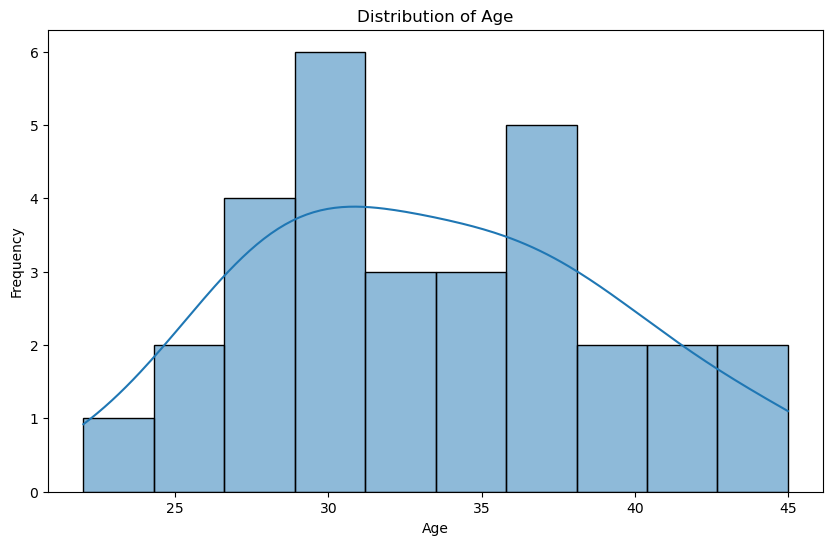

In [84]:
# Plotting the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [85]:
# Tech Savviness Levels
print(data['Tech Savviness'].value_counts())

Tech Savviness
Intermediate    14
Advanced         9
Beginner         7
Name: count, dtype: int64


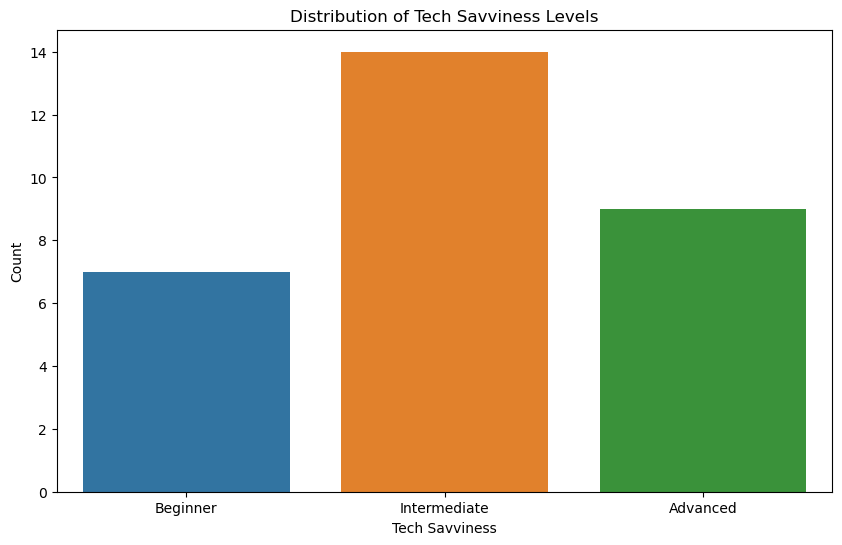

In [86]:
# Plotting tech savviness levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Tech Savviness', data=data, order=['Beginner', 'Intermediate', 'Advanced'])
plt.title('Distribution of Tech Savviness Levels')
plt.xlabel('Tech Savviness')
plt.ylabel('Count')
plt.show()

In [87]:
# Frequency of PWA Usage
data['Frequency of PWA Usage'].value_counts()

Frequency of PWA Usage
Daily      15
Weekly     10
Monthly     5
Name: count, dtype: int64

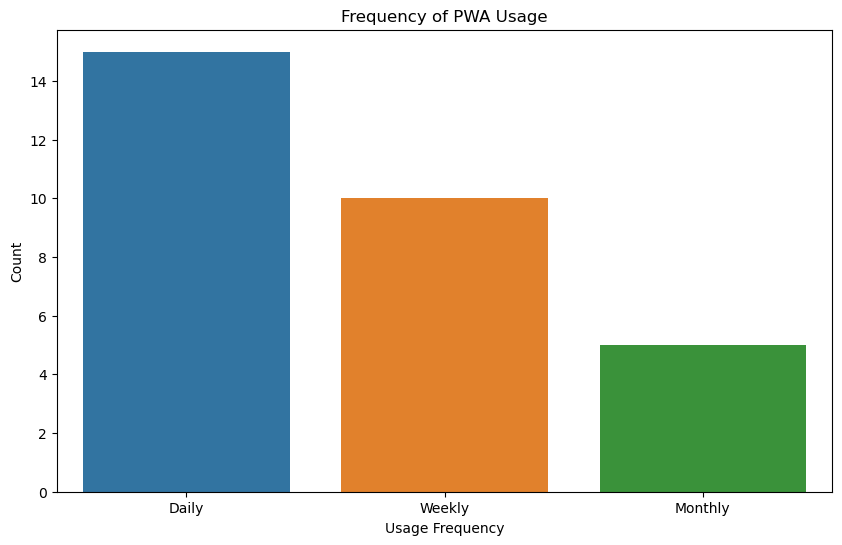

In [88]:
# Plotting Frequency of PWA Usage
plt.figure(figsize=(10, 6))
sns.countplot(x='Frequency of PWA Usage', data=data)
plt.title('Frequency of PWA Usage')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.show()

In [89]:
# Duration of Usage Sessions
# Converting duration to a numerical format for analysis
data['Duration Minutes'] = data['Duration of Usage Sessions'].replace({'30 minutes': 30, '45 minutes': 45, '1 hour': 60, '20 minutes': 20, '2 hours': 120})

data['Duration Minutes'].describe()


count     30
unique     6
top       45
freq      10
Name: Duration Minutes, dtype: int64

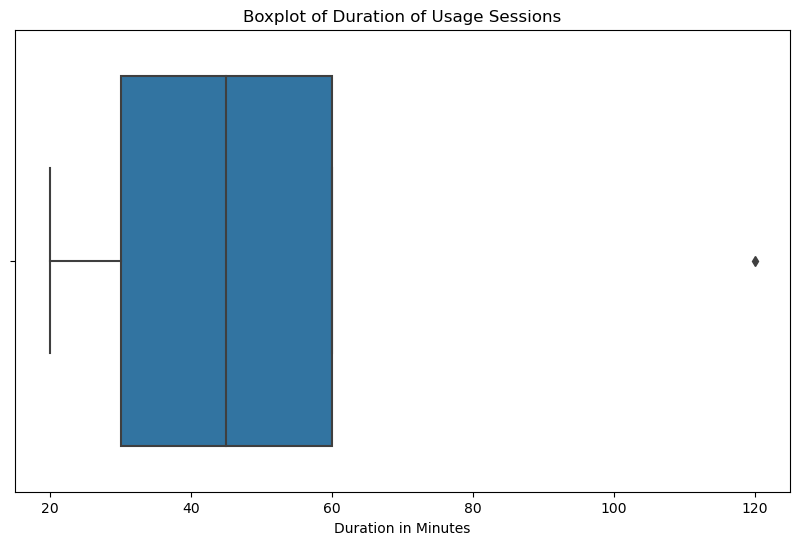

In [90]:
def convert_to_minutes(duration):
    if 'hour' in duration:
        return int(duration.split()[0]) * 60
    elif 'minute' in duration:
        return int(duration.split()[0])
    return 0

data['Duration Minutes'] = data['Duration of Usage Sessions'].apply(convert_to_minutes)

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Duration Minutes'])  # Correct parameter usage
plt.title('Boxplot of Duration of Usage Sessions')
plt.xlabel('Duration in Minutes')
plt.show()

## User Engagement Analysis

### Cross-Tabulation:

In [91]:
# Cross-tabulation of Frequency of PWA Usage, Duration of Usage Sessions, and Likelihood to Recommend
cross_tab = pd.crosstab(index=[data['Frequency of PWA Usage'], data['Duration of Usage Sessions']], 
                        columns=data['Likelihood to Recommend PWAs'], 
                        margins=True, margins_name="Total")

print("Cross-Tabulation between Usage Frequency, Duration and Likelihood to Recommend:")
cross_tab

Cross-Tabulation between Usage Frequency, Duration and Likelihood to Recommend:


Likelihood to Recommend PWAs                       Likely  Neutral  \
Frequency of PWA Usage Duration of Usage Sessions                    
Daily                  1 hour                           3        0   
                       20 minutes                       1        0   
                       30 minutes                       6        0   
                       40 minutes                       1        0   
                       45 minutes                       3        0   
Monthly                1 hour                           2        0   
                       2 hours                          0        1   
                       30 minutes                       1        0   
                       45 minutes                       1        0   
Weekly                 1 hour                           4        0   
                       45 minutes                       6        0   
Total                                                  28        1   

Likelihood to Recommend PWAs                       Very Likely  Total  
Frequency of PWA Usage Duration of Usage Sessions                      
Daily                  1 hour                                0      3  
                       20 minutes                            0      1  
                       30 minutes                            1      7  
                       40 minutes                            0      1  
                       45 minutes                            0      3  
Monthly                1 hour                                0      2  
                       2 hours                               0      1  
                       30 minutes                            0      1  
                       45 minutes                            0      1  
Weekly                 1 hour                                0      4  
                       45 minutes                            0      6  
Total                                                        1     30

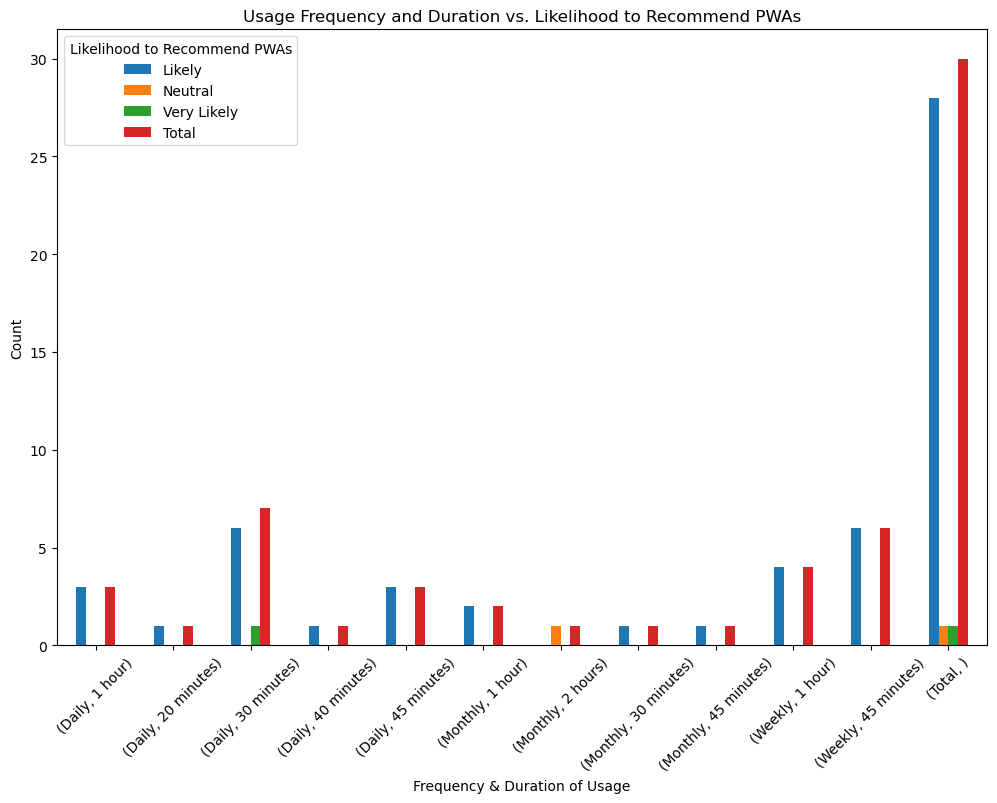

In [92]:
# Visualize this relationship
cross_tab.plot(kind='bar', figsize=(12, 8))
plt.title('Usage Frequency and Duration vs. Likelihood to Recommend PWAs')
plt.xlabel('Frequency & Duration of Usage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Likert Scale Analysis:

In [93]:
# Analysis of Likert Scale items
likert_items = data[['Overall Satisfaction with PWAs', 'Offline Functionality Satisfaction', 'Accessibility Features Satisfaction']]
likert_items.describe()

,Overall Satisfaction with PWAs,Offline Functionality Satisfaction,Accessibility Features Satisfaction
count,30,30,30
unique,3,3,2
top,Satisfied,Satisfied,Satisfied
freq,27,27,29


In [94]:
# Visualizing the satisfaction levels
# Mapping Likert scale responses to numeric values
satisfaction_mapping = {
    'Very Unsatisfied': 1,
    'Unsatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
}

# Apply mapping
data['Overall Satisfaction with PWAs'] = data['Overall Satisfaction with PWAs'].map(satisfaction_mapping)
data['Offline Functionality Satisfaction'] = data['Offline Functionality Satisfaction'].map(satisfaction_mapping)
data['Accessibility Features Satisfaction'] = data['Accessibility Features Satisfaction'].map(satisfaction_mapping)

# Create the dataframe for plotting
likert_items = data[['Overall Satisfaction with PWAs', 'Offline Functionality Satisfaction', 'Accessibility Features Satisfaction']]


<Figure size 1600x1200 with 0 Axes>

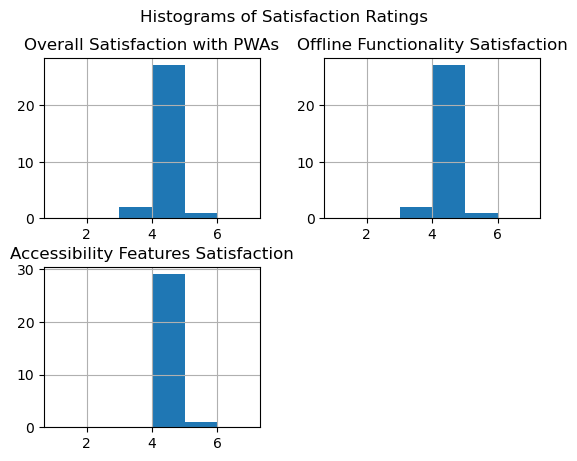

In [95]:
# Visualizing the satisfaction levels
plt.figure(figsize=(16, 12))
likert_items.hist(bins=range(1, 8)) 
plt.suptitle('Histograms of Satisfaction Ratings')
plt.show()


## Comparative Analysis

### ANOVA or t-tests:

In [96]:
# Define a mapping from the categorical description to a numerical value
load_time_mapping = {
    'Very Fast': 5,
    'Fast': 4,
    'Average': 3,
    'Slow': 2,
    'Very Slow': 1
}

# Apply the mapping to the column
data['Initial Load Time Perception'] = data['Initial Load Time Perception'].map(load_time_mapping)

# Now you should be able to convert the column to float
data['Initial Load Time Perception'] = data['Initial Load Time Perception'].astype(float)


In [97]:
# statsmodels is imported
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA
model = ols('Q("Initial Load Time Perception") ~ C(Q("Tech Savviness"))', data=data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print("ANOVA for Initial Load Time based on Tech Savviness:")
print(anova_result)


ANOVA for Initial Load Time based on Tech Savviness:
                          sum_sq    df        F    PR(>F)
C(Q("Tech Savviness"))  0.077778   2.0  1.18125  0.322259
Residual                0.888889  27.0      NaN       NaN


In [98]:
# Define a mapping from the categorical description to a numerical value
navigation_mapping = {
    'Very Easy': 5,
    'Easy': 4,
    'Average': 3,
    'Hard': 2,
    'Very Hard': 1
}

# Apply the mapping to the column
data['Ease of Navigation'] = data['Ease of Navigation'].map(navigation_mapping)

# Now convert the column to float
data['Ease of Navigation'] = data['Ease of Navigation'].astype(float)

group1 = data[data['Tech Savviness'] == 'Beginner']['Ease of Navigation']
group2 = data[data['Tech Savviness'] == 'Advanced']['Ease of Navigation']

# Ensure that there are no NaN values that could cause the t-test to fail
group1 = group1.dropna()
group2 = group2.dropna()

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
#print(f"T-test between Beginner and Advanced for Ease of Navigation: t={t_stat}, p={p_value}")


c:\Users\fkang\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [99]:
# Check the size of each group
print("Beginner group size:", group1.size)
print("Advanced group size:", group2.size)

# Check the variance within each group
print("Beginner group variance:", group1.var())
print("Advanced group variance:", group2.var())

# If variance is zero, check the unique values within each group
print("Unique values in Beginner group:", group1.unique())
print("Unique values in Advanced group:", group2.unique())


Beginner group size: 7
Advanced group size: 9
Beginner group variance: 0.0
Advanced group variance: 0.0
Unique values in Beginner group: [4.]
Unique values in Advanced group: [4.]


### Device Usage Patterns:

Device Usage Patterns:
Laptop        16
Smartphone    29
Tablet        10
dtype: int64


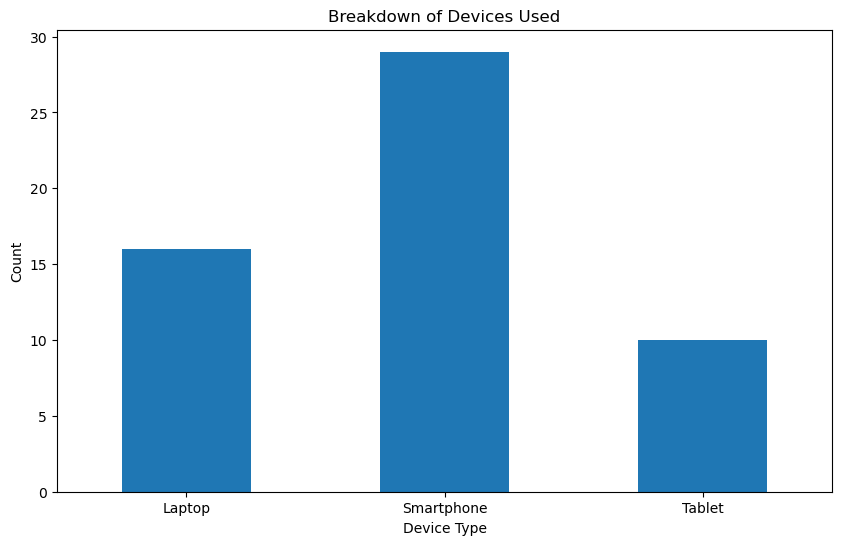

In [100]:
# Breakdown of Devices Used
device_counts = data['Devices Used'].str.get_dummies(sep=', ').sum()
print("Device Usage Patterns:")
print(device_counts)

# Plotting the device usage
device_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Breakdown of Devices Used')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## Performance Metric Evaluation

### Correlation Analysis:

Correlation Matrix:
                                  Initial Load Time Numeric  \
Initial Load Time Numeric                               NaN   
Speed of Content Updates Numeric                        NaN   
Tech Savviness Encoded                                  NaN   
Occupation Encoded                                      NaN   
Frequency of Use Encoded                                NaN   

                                  Speed of Content Updates Numeric  \
Initial Load Time Numeric                                      NaN   
Speed of Content Updates Numeric                          1.000000   
Tech Savviness Encoded                                    0.180024   
Occupation Encoded                                        0.210476   
Frequency of Use Encoded                                 -0.172414   

                                  Tech Savviness Encoded  Occupation Encoded  \
Initial Load Time Numeric                            NaN                 NaN   
Speed of Content Upd

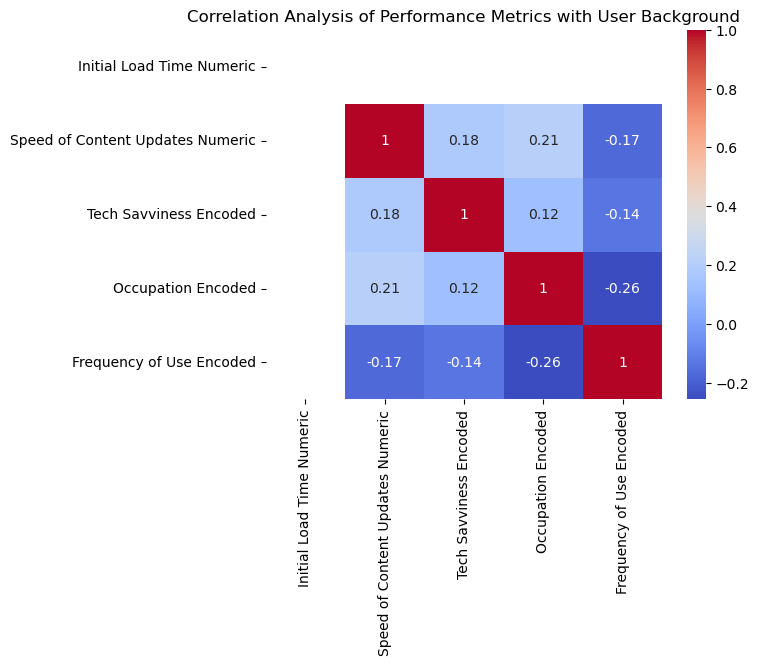

In [101]:
# Encoding categorical variables numerically for correlation analysis
data_encoded = data.copy()
data_encoded['Tech Savviness Encoded'] = data['Tech Savviness'].astype('category').cat.codes
data_encoded['Occupation Encoded'] = data['Occupation'].astype('category').cat.codes
data_encoded['Frequency of Use Encoded'] = data['Frequency of PWA Usage'].astype('category').cat.codes

# Map string values to numeric values
load_time_mapping = {
    'Very Slow': 1,
    'Slow': 2,
    'Medium': 3,
    'Fast': 4,
    'Very Fast': 5
}
data_encoded['Initial Load Time Numeric'] = data['Initial Load Time Perception'].map(load_time_mapping)
data_encoded['Speed of Content Updates Numeric'] = data['Speed of Content Updates'].map(load_time_mapping)

# Correlation matrix
correlation_matrix = data_encoded[['Initial Load Time Numeric', 'Speed of Content Updates Numeric', 
                                   'Tech Savviness Encoded', 'Occupation Encoded', 
                                   'Frequency of Use Encoded']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis of Performance Metrics with User Background')
plt.show()


## Detailed User Experience Insights

### Thematic Analysis:

In [102]:
from collections import Counter
import itertools

# Function to split and lower case
def split_and_lower(text):
    return text.lower().split()

# Applying the function and flattening the list
likes = list(itertools.chain(*data['Likes About PWAs'].map(split_and_lower)))
improvements = list(itertools.chain(*data['Improvements for PWAs'].map(split_and_lower)))
difficulties = list(itertools.chain(*data['Difficulties Encountered'].map(split_and_lower)))

# Counting occurrences
likes_count = Counter(likes)
improvements_count = Counter(improvements)
difficulties_count = Counter(difficulties)

print("Most common likes:", likes_count.most_common(5))
print("Most common improvements needed:", improvements_count.most_common(5))
print("Most common difficulties:", difficulties_count.most_common(5))


Most common likes: [('of', 12), ('variety', 9), ('to', 8), ('content.', 8), ('news', 8)]
Most common improvements needed: [('improved', 12), ('enhanced', 9), ('checkout', 7), ('process.', 7), ('notification', 7)]
Most common difficulties: [('none', 17), ('encountered.', 17), ('occasional', 10), ('loading', 5), ('slow', 4)]


In [103]:
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import itertools

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Enhanced split and lower function with stopwords filtering
def split_and_lower_filtered(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]  # Filter out punctuation
    return filtered_words

# Applying the updated function
likes = list(itertools.chain(*data['Likes About PWAs'].map(split_and_lower_filtered)))
improvements = list(itertools.chain(*data['Improvements for PWAs'].map(split_and_lower_filtered)))
difficulties = list(itertools.chain(*data['Difficulties Encountered'].map(split_and_lower_filtered)))

# Counting occurrences
likes_count = Counter(likes)
improvements_count = Counter(improvements)
difficulties_count = Counter(difficulties)


In [104]:
print("Most common likes:", likes_count.most_common(5))
print("Most common improvements needed:", improvements_count.most_common(5))
print("Most common difficulties:", difficulties_count.most_common(5))

Most common likes: [('variety', 9), ('news', 8), ('access', 7), ('easy', 6), ('convenient', 6)]
Most common improvements needed: [('improved', 12), ('enhanced', 9), ('checkout', 7), ('notification', 7), ('streamlined', 4)]
Most common difficulties: [('none', 17), ('occasional', 10), ('loading', 5), ('slow', 4), ('issues', 3)]


## Preference and Satisfaction Analysis

### Chi-Square Tests:

In [105]:
from scipy.stats import chi2_contingency

# Creating a contingency table for Age and Preference for PWAs
contingency_table = pd.crosstab(data['Age'], data['Preference for Using PWAs'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test result: Chi2 = {chi2}, p-value = {p}")


Chi-Square Test result: Chi2 = 35.7, p-value = 0.5762816469062314


### Regression Analysis:

In [106]:
import statsmodels.api as sm

# Independent variables
X = data_encoded[['Tech Savviness Encoded', 'Occupation Encoded', 'Frequency of Use Encoded', 'Offline Functionality Satisfaction', 'Accessibility Features Satisfaction']]
X = sm.add_constant(X)  # adding a constant

# Dependent variable
y = data_encoded['Overall Satisfaction with PWAs']  # corrected column name

# Fit regression model
model = sm.OLS(y, X).fit()

# Output the summary of the regression model
print(model.summary())


                                  OLS Regression Results                                  
Dep. Variable:     Overall Satisfaction with PWAs   R-squared:                       1.000
Model:                                        OLS   Adj. R-squared:                  1.000
Method:                             Least Squares   F-statistic:                 1.311e+28
Date:                            Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                                    09:41:22   Log-Likelihood:                 939.75
No. Observations:                              30   AIC:                            -1868.
Df Residuals:                                  24   BIC:                            -1859.
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                                          coef    std err          t      P>|t|      [0.02

## Content and Accessibility

### Visual Appeal Impact:

In [107]:
# Correlation between Visual Appeal and Overall Satisfaction
visual_appeal_corr = data['Visual Appeal'].astype('category').cat.codes.corr(data['Overall Satisfaction with PWAs'].astype('category').cat.codes)

print(f"Correlation between Visual Appeal and Overall Satisfaction with PWAs: {visual_appeal_corr}")

Correlation between Visual Appeal and Overall Satisfaction with PWAs: 0.6101936608636918


## Feature-Specific Insights

### Feature Satisfaction Analysis:


In [108]:
# Assuming each feature satisfaction has been encoded numerically
features = ['Offline Functionality Satisfaction', 'Speed of Content Updates']
for feature in features:
    correlation = data[feature].astype('category').cat.codes.corr(data['Overall Satisfaction with PWAs'].astype('category').cat.codes)
    print(f"Correlation of {feature} with Overall Satisfaction with PWAs: {correlation}")


Correlation of Offline Functionality Satisfaction with Overall Satisfaction with PWAs: 0.9999999999999998
Correlation of Speed of Content Updates with Overall Satisfaction with PWAs: 0.6101936608636918


In [109]:
# Defining the feature list
features = ['Offline Functionality Satisfaction', 'Speed of Content Updates']

# Encoding the categorical variables numerically
X = data[features].apply(lambda x: x.astype('category').cat.codes)
X = sm.add_constant(X)  # adding a constant

# Correcting the column name for the dependent variable
y = data['Overall Satisfaction with PWAs'].astype('category').cat.codes

# Fitting the OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.390e+30
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:41:22   Log-Likelihood:                 994.20
No. Observations:                  30   AIC:                            -1982.
Df Residuals:                      27   BIC:                            -1978.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Preference Profiles:


In [110]:
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns for clustering
numeric_cols = ['Age', 'Offline Functionality Satisfaction', 'Accessibility Features Satisfaction']
data_numeric = data[numeric_cols]

# Scaling the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


# PARALLEL PROCESSING
import os
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans

# Initialize KMeans with specified parameters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(data_scaled)

# Assign clusters back to the original data
data['Preference Cluster'] = kmeans.labels_

c:\Users\fkang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [111]:
# Summary statistics for each cluster
data[numeric_cols].groupby(data['Preference Cluster']).mean()

,Age,Offline Functionality Satisfaction,Accessibility Features Satisfaction
Preference Cluster,,,
0,29.25,4.000000,4.0
1,39.00,3.846154,4.0
2,27.00,5.000000,5.0


In [112]:
# Count of instances per cluster
data['Preference Cluster'].value_counts()


Preference Cluster
0    16
1    13
2     1
Name: count, dtype: int64

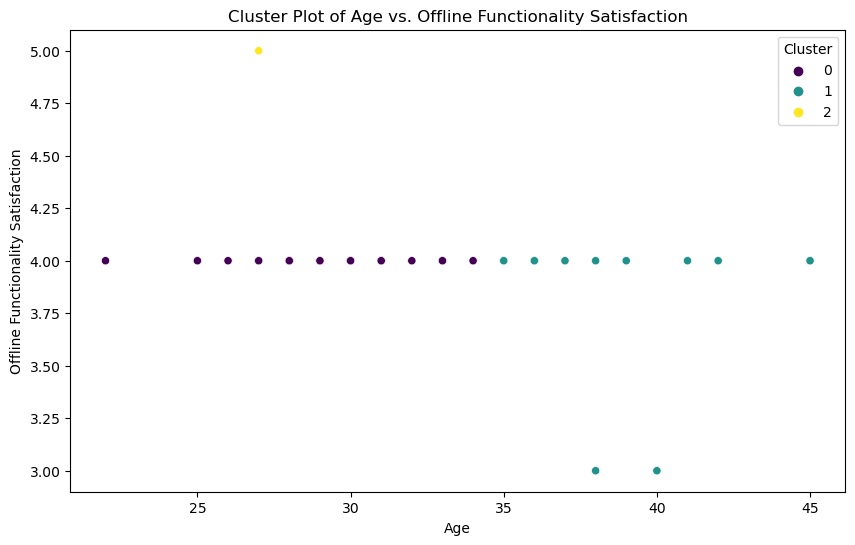

In [113]:
# Scatter plot for two features colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Offline Functionality Satisfaction', hue='Preference Cluster', data=data, palette='viridis')
plt.title('Cluster Plot of Age vs. Offline Functionality Satisfaction')
plt.xlabel('Age')
plt.ylabel('Offline Functionality Satisfaction')
plt.legend(title='Cluster')
plt.show()


## Difficulty and Improvement Analysis

### Difficulty Frequency Analysis:

In [114]:
# Assuming difficulties are listed in a column and separated by commas if multiple
difficulty_list = data['Difficulties Encountered'].str.split(', ').explode()
difficulty_counts = difficulty_list.value_counts()

print("Frequency of Reported Difficulties:")
print(difficulty_counts)

Frequency of Reported Difficulties:
Difficulties Encountered
None encountered.                                             17
Occasional slow loading of images.                             3
Occasional issues with page loading.                           2
Occasionally slow loading times when connectivity is poor.     1
Limited offline functionality.                                 1
Occasional site crashes during checkout.                       1
Difficulty in accessing certain features.                      1
Occasional slowdowns during peak hours.                        1
Occasional lag when loading images.                            1
Occasional issues with payment processing.                     1
Occasional lag during video playback.                          1
Name: count, dtype: int64


### Improvement Suggestion Frequency Analysis:

In [115]:
# Assuming improvements are listed similarly to difficulties
improvement_list = data['Improvements for PWAs'].str.split(', ').explode()
improvement_counts = improvement_list.value_counts()

print("Frequency of Suggested Improvements:")
print(improvement_counts)

Frequency of Suggested Improvements:
Improvements for PWAs
Streamlined checkout process.                        4
Enhanced notification system.                        3
Improved notification system.                        3
Faster checkout process.                             2
More personalized suggestions based on interests.    1
Improved user customization.                         1
Enhanced content filtering options.                  1
Improved personalization features.                   1
Improved navigation options.                         1
Enhanced search functionality.                       1
Improved user personalization.                       1
Improved content filtering.                          1
Enhanced personalization features.                   1
Ability to save articles for offline reading.        1
Improved checkout process.                           1
Enhanced user customization options.                 1
Improved notification customization.                 1
Enhanc